In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
inst_df = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv',
                      usecols=['OPEID6', 'INSTNM', 
                               'CITY', 'STABBR', 
                               'FTFTPCTPELL','TUITIONFEE_IN', 
                               'TUITIONFEE_OUT', 'ADM_RATE', 
                               'NPT4_PUB', 'NPT4_PRIV', 
                               'NPT41_PUB', 'NPT41_PRIV', 
                               'NPT45_PUB', 'NPT45_PRIV', 
                               'MD_EARN_WNE_P10', 'C100_4'],
                               low_memory= False)
inst_df.head()

,OPEID6,INSTNM,CITY,STABBR,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT45_PUB,NPT41_PRIV,NPT45_PRIV,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,C100_4,FTFTPCTPELL
0,1002,Alabama A & M University,Normal,AL,0.8965,15529.0,NaN,14694.0,20483.0,NaN,NaN,10024.0,18634.0,36339.0,0.1052,0.6925
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.8060,16530.0,NaN,13443.0,19717.0,NaN,NaN,8568.0,20400.0,46990.0,0.3816,0.3563
2,25034,Amridge University,Montgomery,AL,NaN,NaN,17618.0,NaN,NaN,17385.0,NaN,6950.0,6950.0,37895.0,0.2500,0.6667
3,1055,University of Alabama in Huntsville,Huntsville,AL,0.7711,17208.0,NaN,13631.0,19862.0,NaN,NaN,11338.0,23734.0,54361.0,0.3109,0.2304
4,1005,Alabama State University,Montgomery,AL,0.9888,19534.0,NaN,19581.0,17559.0,NaN,NaN,11068.0,19396.0,32084.0,0.1462,0.7590


In [3]:
inst_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OPEID6           6662 non-null   int64  
 1   INSTNM           6662 non-null   object 
 2   CITY             6662 non-null   object 
 3   STABBR           6662 non-null   object 
 4   ADM_RATE         1960 non-null   float64
 5   NPT4_PUB         1828 non-null   float64
 6   NPT4_PRIV        3565 non-null   float64
 7   NPT41_PUB        1823 non-null   float64
 8   NPT45_PUB        1304 non-null   float64
 9   NPT41_PRIV       3506 non-null   float64
 10  NPT45_PRIV       1809 non-null   float64
 11  TUITIONFEE_IN    3830 non-null   float64
 12  TUITIONFEE_OUT   3830 non-null   float64
 13  MD_EARN_WNE_P10  5025 non-null   float64
 14  C100_4           2007 non-null   float64
 15  FTFTPCTPELL      5539 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 1.9 MB


In [4]:
fieldOfStudy_df = pd.read_csv('../data/FieldOfStudyData1718_1819_PP.csv',
                              low_memory= False,
                              usecols=['OPEID6', 'INSTNM', 
                                       'CREDDESC', 'CIPDESC', 
                                       'CONTROL'])

fieldOfStudy_df.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


In [5]:
fieldOfStudy_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224849 entries, 0 to 224848
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   OPEID6    224849 non-null  int64 
 1   INSTNM    224849 non-null  object
 2   CONTROL   224849 non-null  object
 3   CIPDESC   224849 non-null  object
 4   CREDDESC  224849 non-null  object
dtypes: int64(1), object(4)
memory usage: 64.7 MB


## (3A) What state has the greatest number of universities in this database?

In [6]:
inst_df.groupby('STABBR')['OPEID6'].count().sort_values(ascending=False).head(10)

STABBR
CA    705
NY    450
TX    429
FL    394
PA    345
OH    288
IL    253
MI    187
NC    178
GA    174
Name: OPEID6, dtype: int64

## (3B) What city, in which state, has the greatest number of universities in this database?

In [7]:
inst_df.groupby(['STABBR','CITY'])['OPEID6'].count().sort_values(ascending=False).head(10)

STABBR  CITY        
NY      New York        81
IL      Chicago         70
TX      Houston         66
CA      Los Angeles     52
NY      Brooklyn        51
TX      San Antonio     46
FL      Miami           44
PA      Philadelphia    37
GA      Atlanta         37
CA      San Diego       36
Name: OPEID6, dtype: int64

## (3C) How much memory can you save if you set the CITY and STABBR columns in institutions_df to be categories?

In [8]:
x = inst_df.memory_usage(deep=True).sum()
inst_df[['CITY','STABBR']] = inst_df[['CITY','STABBR']].astype('category')
y = inst_df.memory_usage(deep=True).sum()
print(x-y)

492659


## (3D)  Create a histogram showing how many bachelor programs universities offer.

<Axes: ylabel='Frequency'>

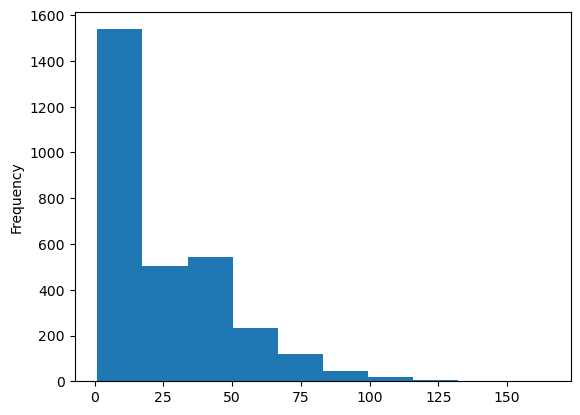

In [9]:
fieldOfStudy_df.loc[fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree'].groupby('INSTNM')['CREDDESC'].count().sort_values(ascending=False).plot.hist()

x-axis = how many programs are offered and y-axis = in how many universities. 

## (3E) Determine which university offers the greatest number of bachelor programs.

In [10]:
fieldOfStudy_df.loc[fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree'].groupby('INSTNM')['CREDDESC'].count().sort_values(ascending=False).head(1)

INSTNM
Westminster College    165
Name: CREDDESC, dtype: int64

## (3F) Create a histogram showing how many graduate (master’s and doctoral) programs universities offer.

<Axes: ylabel='Frequency'>

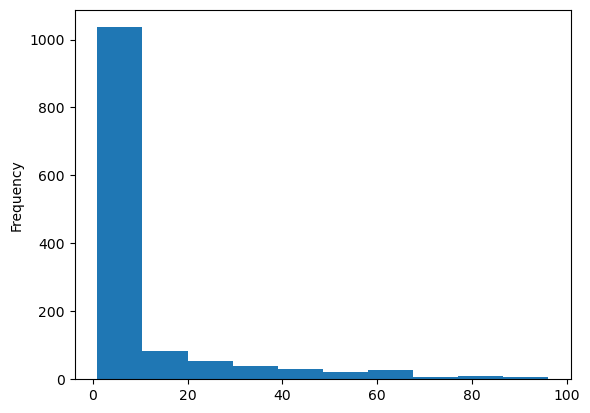

In [11]:
fieldOfStudy_df.loc[(fieldOfStudy_df['CREDDESC'] == "Doctoral Degree") | (fieldOfStudy_df['CREDDESC'] == "Master's Degree ")].groupby('INSTNM')['CREDDESC'].count().sort_values(ascending=False).plot.hist()

## (3G)  Determine which university offers the greatest number of different graduate (master + doctoral) programs.

In [12]:
fieldOfStudy_df.loc[fieldOfStudy_df['CREDDESC'].isin(["Master's Degree", "Doctoral Degree"])].groupby('INSTNM')['CIPDESC'].count().sort_values(ascending=False).head(10)

INSTNM
University of Washington-Seattle Campus      237
Pennsylvania State University-Main Campus    230
New York University                          226
University of Minnesota-Twin Cities          205
Ohio State University-Main Campus            200
Arizona State University Campus Immersion    199
University of Southern California            199
University of Arizona                        195
University of Florida                        194
University of Wisconsin-Madison              190
Name: CIPDESC, dtype: int64

## (4A) How many universities offer bachelor’s degrees but not master’s or doctorates?

In [13]:
ug = fieldOfStudy_df.loc[(fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree' , 'INSTNM')]
pg = fieldOfStudy_df.loc[(fieldOfStudy_df['CREDDESC'] == "Doctoral Degree") | (fieldOfStudy_df['CREDDESC'] == "Master's Degree"), 'INSTNM']

ug.loc[~ug.isin(pg)].drop_duplicates().count()

np.int64(923)

## (4B) How many universities offer master’s and doctoral degrees but not bachelor’s?

In [14]:
pg.loc[~pg.isin(ug)].drop_duplicates().count()

np.int64(404)

## (4C) How many institutions offer bachelor’s degrees whose name contains the term “Computer Science”?

In [15]:
fieldOfStudy_df.loc[(fieldOfStudy_df['CIPDESC'].str.contains('Computer Science')) & (fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree'), 'INSTNM'].drop_duplicates().count()

np.int64(762)

## (4D) The CONTROL field describes the types of institutions in the database. How many of each type offer a computer science program?

In [16]:
fieldOfStudy_df.loc[(fieldOfStudy_df['CIPDESC'].str.contains('Computer Science')) &
                     (fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree'), ['CONTROL','INSTNM']].groupby('CONTROL').count()

,INSTNM
CONTROL,
Foreign,32
"Private, for-profit",18
"Private, nonprofit",501
Public,273


## 5. Create a pie chart showing the different types of institutions that offer CS (short for “computer science”) degrees.

array([<Axes: ylabel='INSTNM'>], dtype=object)

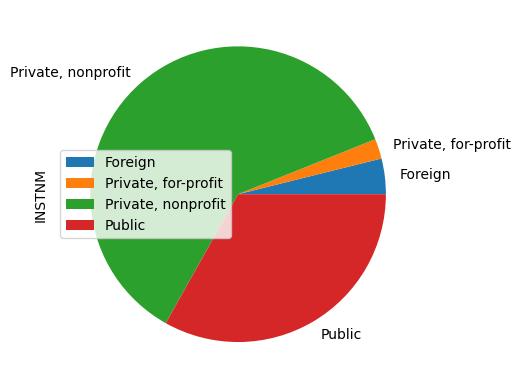

In [17]:
fieldOfStudy_df.loc[(fieldOfStudy_df['CIPDESC'].str.contains('Computer Science')) &
                     (fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree'), ['CONTROL','INSTNM']].groupby('CONTROL').count().plot.pie(subplots=True)

## 6. Determine the minimum, median, mean, and maximum tuitions for an undergrad CS degree. (We define this as a bachelor’s program with the phrase “Computer Science” in the name.) When comparing tuition, use TUITIONFEE_OUT for all schools.

In [18]:
ug_cs = fieldOfStudy_df[['OPEID6','INSTNM']][(fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree') & 
                                             (fieldOfStudy_df['CIPDESC'].str.contains('Computer Science'))]
ug_cs



,OPEID6,INSTNM
360,1005,Alabama State University
671,8310,Auburn University at Montgomery
1110,1003,Faulkner University
1936,1033,Oakwood University
2040,1036,Samford University
...,...,...
223531,30914,University of Wollongong
223619,30961,La Trobe University
223971,34353,Anglia Ruskin University
224154,35173,University of Brighton


In [19]:
inst_df['TUITIONFEE_OUT'][inst_df['OPEID6'].isin(ug_cs['OPEID6']) & inst_df['INSTNM'].isin(ug_cs['INSTNM'])].describe()

count      716.000000
mean     31583.314246
std      14505.858502
min       3154.000000
25%      19447.000000
50%      30862.000000
75%      42241.500000
max      61671.000000
Name: TUITIONFEE_OUT, dtype: float64

## 7. Describe the tuition again, but grouped by the different types of universities (CONTROL).

In [20]:
ug_cs_cnt = fieldOfStudy_df[['OPEID6','INSTNM', 'CONTROL']][(fieldOfStudy_df['CREDDESC'] == 'Bachelors Degree') & 
                                                            (fieldOfStudy_df['CIPDESC'].str.contains('Computer Science'))]
ug_cs_cnt_ = ug_cs_cnt
ug_cs_cnt = ug_cs_cnt.set_index('OPEID6')
ug_cs_cnt

,INSTNM,CONTROL
OPEID6,,
1005,Alabama State University,Public
8310,Auburn University at Montgomery,Public
1003,Faulkner University,"Private, nonprofit"
1033,Oakwood University,"Private, nonprofit"
1036,Samford University,"Private, nonprofit"
...,...,...
30914,University of Wollongong,Foreign
30961,La Trobe University,Foreign
34353,Anglia Ruskin University,Foreign


In [21]:
inst_cs_cost = inst_df[['OPEID6','INSTNM','TUITIONFEE_OUT']][inst_df['OPEID6'].isin(ug_cs_cnt_['OPEID6']) & inst_df['INSTNM'].isin(ug_cs_cnt_['INSTNM'])].set_index('OPEID6')
inst_cs_cost

,INSTNM,TUITIONFEE_OUT
OPEID6,,
1005,Alabama State University,19396.0
8310,Auburn University at Montgomery,18820.0
1003,Faulkner University,22990.0
1033,Oakwood University,19990.0
1036,Samford University,34198.0
...,...,...
1577,Kennesaw State University,17690.0
3511,Milligan University,35600.0
1083,University of Arizona-Sierra Vista,NaN


In [22]:
inst_cs_cost.merge(ug_cs_cnt).groupby('CONTROL')['TUITIONFEE_OUT'].describe().T

CONTROL,"Private, for-profit","Private, nonprofit",Public
count,15.000000,503.000000,267.000000
mean,14780.533333,36936.431412,22770.194757
std,5364.891836,14253.544298,9203.355227
min,8280.000000,4300.000000,3154.000000
25%,11828.000000,28565.000000,16224.000000
50%,12311.000000,36484.000000,20574.000000
75%,18095.000000,48302.000000,27673.000000
max,25820.000000,61671.000000,47220.000000


## 8. Determine the correlation between admission rate and tuition cost. How would you interpret this?

In [23]:
inst_df[['TUITIONFEE_OUT','ADM_RATE']].corr()

,TUITIONFEE_OUT,ADM_RATE
TUITIONFEE_OUT,1.000000,-0.309658
ADM_RATE,-0.309658,1.000000


## 9. Create a scatter plot with tuition on the x axis, admission rate on the y axis, and median earnings after 10 years are used for colorizing. Use the “Spectral” colormap. Where do the lowest-paid graduates show up on the graph?

<Axes: xlabel='TUITIONFEE_OUT', ylabel='ADM_RATE'>

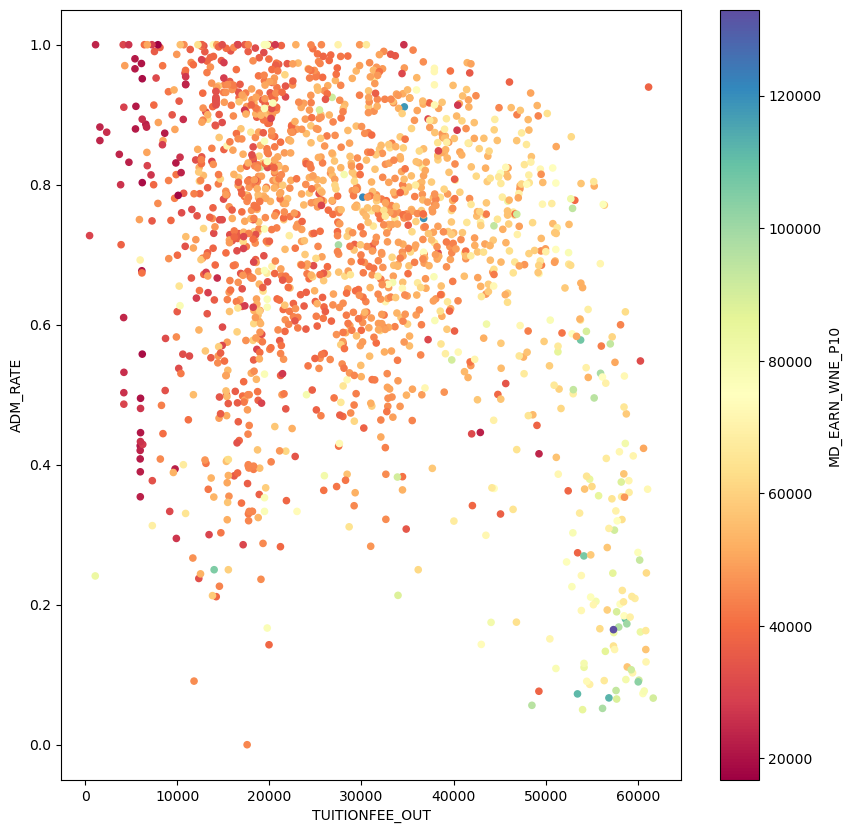

In [24]:
inst_df[['TUITIONFEE_OUT','ADM_RATE','MD_EARN_WNE_P10']].plot.scatter(x = "TUITIONFEE_OUT", 
                                                    y = 'ADM_RATE' ,
                                                    colormap = 'Spectral',
                                                    c = 'MD_EARN_WNE_P10',
                                                    figsize = (10,10)
                                                    )

## 10. Determine which universities are in the top 25% of tuition and also the top 25% with Pell grants (i.e., government assistance to lower-income students). Print only the institution name, city, and state, ordered by institution name.

In [25]:
inst_df.loc[(inst_df['TUITIONFEE_OUT'] > 
             inst_df['TUITIONFEE_OUT'].quantile(0.75)) & 
                (inst_df['FTFTPCTPELL'] > 
                 inst_df['FTFTPCTPELL'].quantile(0.75)), 
                        ['INSTNM', 'CITY', 'STABBR']].sort_values(by='INSTNM')

,INSTNM,CITY,STABBR
5491,Antioch College,Yellow Springs,OH
1206,Berea College,Berea,KY
1930,Berkeley College-Woodland Park,Woodland Park,NJ
1932,Bloomfield College,Bloomfield,NJ
2334,Chowan University,Murfreesboro,NC
1543,Dorsey College,Madison Heights,MI
3758,Dorsey College-Roseville,Roseville,MI
5138,Dorsey College-Saginaw,Saginaw,MI
3734,Dorsey College-Wayne,Wayne,MI
1542,Dorsey School of Business-Madison Heights,Madison Heights,MI


## 11. NPT4_PUB indicates the average net price for public institutions (in-state tuition) and NPT4_PRIV for private institutions. NPT41_PUB and NPT45_PUB show the average price paid by people in the lowest income bracket (1) versus the highest income bracket (5) at public institutions. NPT41_PRIV and NPT45_PRIV show the average price paid by people in the lowest income bracket (1) versus the highest income bracket (5) at private institutions. At how many institutions does the bottom quintile receive money (i.e., the value is negative)?

In [26]:
inst_df['INSTNM'][(inst_df['NPT41_PUB'] < 0) | (inst_df['NPT41_PRIV'] < 0)].sort_values()

748                 Atlanta Technical College
3446             Bellingham Technical College
194        California Institute of Technology
2335              Cleveland Community College
1698                Coahoma Community College
5597          Coastal Pines Technical College
4849    Escuela De Troqueleria Y Herramentaje
948          Moraine Valley Community College
4216       Putnam Career and Technical Center
450                           Skyline College
5683      Southern Regional Technical College
3019                Trident Technical College
Name: INSTNM, dtype: object

## 12. Determine the average proportion that the bottom quintile pays versus the top quintile at public universities.

In [27]:
inst_df['NPT41_PUB'].mean()/inst_df['NPT45_PUB'].mean()

np.float64(0.5324770719158269)

## 13. Determine the average proportion that the bottom quintile pays versus the top quintile at private universities?

In [28]:
inst_df['NPT41_PRIV'].mean()/inst_df['NPT45_PRIV'].mean()

np.float64(0.6510722129400891)

## 14A.  For which schools in the cheapest 25% do their students have the top 25% of salaries 10 years after graduation?

In [29]:
inst_df['INSTNM'][(inst_df['MD_EARN_WNE_P10']>=
                   inst_df['MD_EARN_WNE_P10'].quantile(0.75))&
                        (inst_df['NPT4_PUB']<=
                         inst_df['NPT4_PUB'].quantile(0.25))].sort_values()

2093                  CUNY Bernard M Baruch College
2096                          CUNY Brooklyn College
2098                              CUNY City College
2101                            CUNY Hunter College
2102      CUNY John Jay College of Criminal Justice
2105                            CUNY Lehman College
2108                            CUNY Queens College
2111                              CUNY York College
203     California State University-Dominguez Hills
208         California State University-Los Angeles
228                                  Canada College
432                            College of San Mateo
2097                  College of Staten Island CUNY
267                                 De Anza College
645                Florida International University
656       George T Baker Aviation Technical College
363                                Moorpark College
2013                  New Mexico Military Institute
450                                 Skyline College
3218        

## 14B. How about private institutions?

In [30]:
inst_df['INSTNM'][(inst_df['MD_EARN_WNE_P10']>=
                   inst_df['MD_EARN_WNE_P10'].quantile(0.75))&
                        (inst_df['NPT4_PRIV']<=
                         inst_df['NPT4_PRIV'].quantile(0.25))].sort_values()

4755                                          ATA College
4732                    American Public University System
3055                   Baptist Health Sciences University
3556                                       Beloit College
3319                             Brigham Young University
842                        Brigham Young University-Idaho
1011                      Calumet College of Saint Joseph
3962                    Center for Advanced Legal Studies
3061                        Christian Brothers University
1877                                College of Saint Mary
4795                         Columbia Southern University
2087    Cooper Union for the Advancement of Science an...
1948    Fairleigh Dickinson University-Metropolitan Ca...
2509                                  Franklin University
895                     Graham Hospital School of Nursing
1448                                   Harvard University
1775                                     Logan University
2162          

## 14C. Is there a correlation between admission rates and completion rates? That is: If a school is highly selective, are students more likely to graduate?

In [31]:
inst_df[['C100_4', 'ADM_RATE']].corr()

,C100_4,ADM_RATE
C100_4,1.000000,-0.336871
ADM_RATE,-0.336871,1.000000


## 14D. Ten years after graduating, from what kinds of schools (private, for-profit, private nonprofit, or public) do people earn, on average, the greatest amount?

In [32]:
uid_ctrl = fieldOfStudy_df[['CONTROL','OPEID6']].drop_duplicates()
uid_ctrl

,CONTROL,OPEID6
0,Public,1002
61,Public,1052
220,"Private, nonprofit",25034
246,Public,1055
358,Public,1005
...,...,...
224843,"Private, for-profit",42624
224844,"Private, for-profit",42640
224846,"Private, for-profit",42753
224847,Public,42837


In [33]:
income_10yrs = inst_df[['MD_EARN_WNE_P10','OPEID6']]
income_10yrs

,MD_EARN_WNE_P10,OPEID6
0,36339.0,1002
1,46990.0,1052
2,37895.0,25034
3,54361.0,1055
4,32084.0,1005
...,...,...
6657,NaN,3329
6658,NaN,3329
6659,NaN,3329
6660,NaN,3329


In [34]:
income_10yrs.merge(uid_ctrl).groupby('CONTROL')['MD_EARN_WNE_P10'].mean().sort_values()

CONTROL
Private, for-profit    30474.754943
Public                 40310.620762
Private, nonprofit     48530.408744
Name: MD_EARN_WNE_P10, dtype: float64

## 14E.  Do people who graduate from “Ivy Plus” schools (the Ivy League as well as MIT, Stanford, and the University of Chicago) earn more than the average private-school university graduate? If so, how much more?

In [35]:
ivy_plus_schools = [
    "Harvard University", "Yale University", "Princeton University",
    "Columbia University", "Cornell University", "Brown University",
    "Dartmouth College", "University of Pennsylvania",
    "Massachusetts Institute of Technology", "Stanford University",
    "University of Chicago"
]

In [36]:
x = inst_df['MD_EARN_WNE_P10'][inst_df['INSTNM'].isin(ivy_plus_schools)].mean()
x

np.float64(92000.4)

In [37]:
y = inst_df['MD_EARN_WNE_P10'][~inst_df['INSTNM'].isin(ivy_plus_schools)].mean()
y

np.float64(39297.47537387836)

In [38]:
x-y

np.float64(52702.92462612163)

## 14F. Do people studying at universities in particular states earn, on average, more after 10 years?

In [39]:
inst_df[['CITY','STABBR']] = inst_df[['CITY','STABBR']].astype('object')
inst_df[['STABBR','MD_EARN_WNE_P10']].groupby('STABBR', observed=True)['MD_EARN_WNE_P10'].mean().sort_values(ascending=False).head(10)

STABBR
MA    53234.396226
RI    50432.789474
DC    49081.470588
CT    48662.017857
VT    48383.857143
NY    47584.653199
NH    46540.791667
WA    44594.678161
PA    44265.733083
MN    43821.510204
Name: MD_EARN_WNE_P10, dtype: float64

## 15. Create a bar plot for the average amount earned, per state, sorted by ascending pay.

<Axes: xlabel='STABBR'>

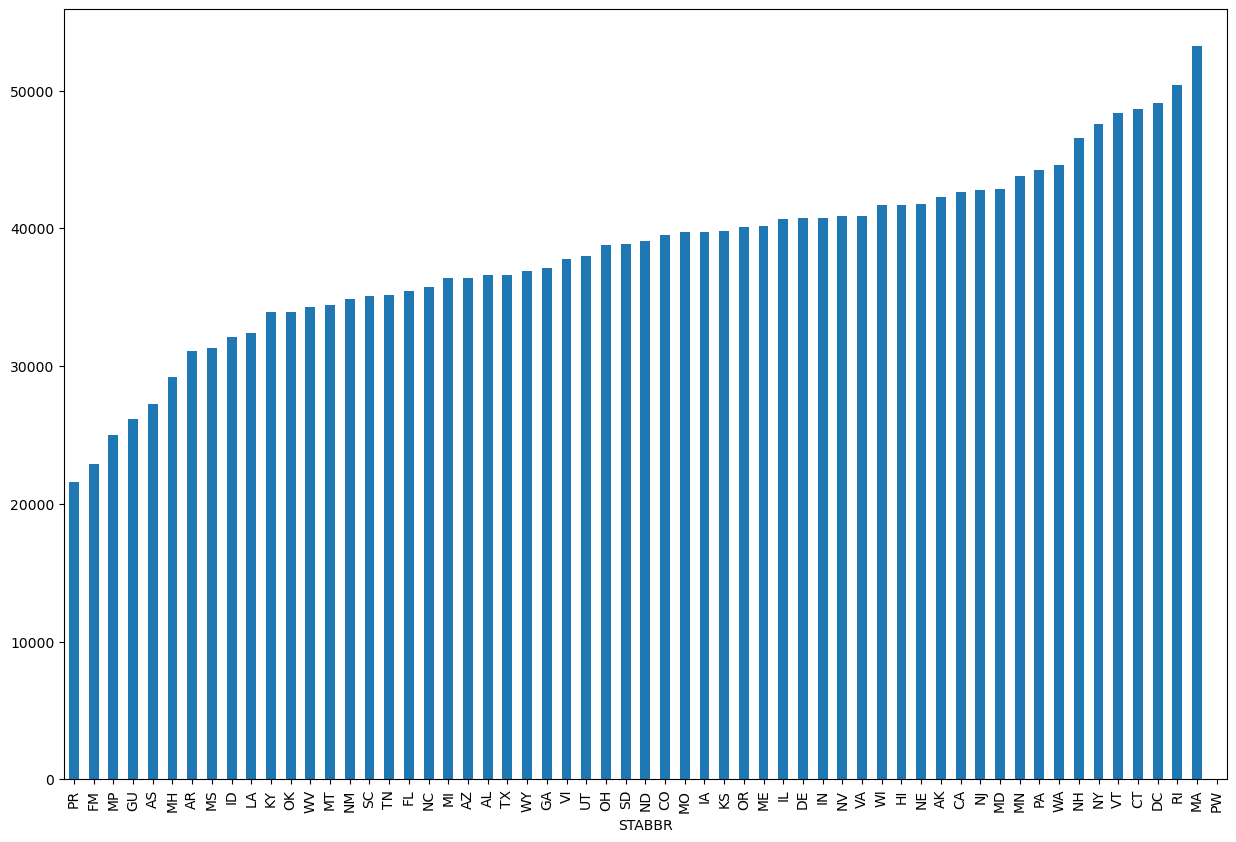

In [40]:
inst_df[['STABBR','MD_EARN_WNE_P10']].groupby('STABBR', observed=True)['MD_EARN_WNE_P10'].mean().sort_values(ascending=True).plot.bar(figsize = (15,10))

## 10. Create a boxplot for the earnings by state.

<Axes: >

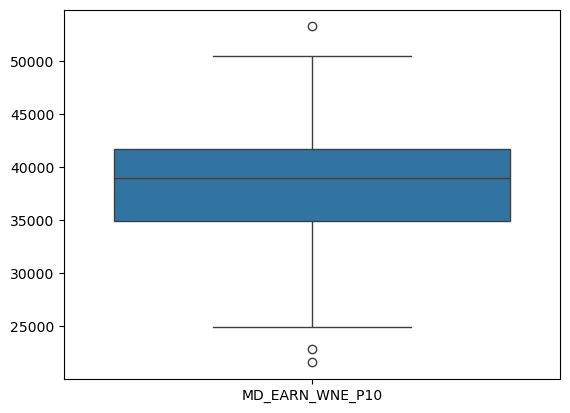

In [41]:
k = inst_df[['STABBR','MD_EARN_WNE_P10']].groupby('STABBR' ,observed=True).mean()
sns.boxplot(data= k)